<a href="https://colab.research.google.com/github/Chaeshin/2324-appdev-sem-f2-07/blob/master/ClusteringReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Segmentation using Clustering**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import dependencies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

**Load the Data**

In [ ]:
df  = pd.read_csv('/content/drive/MyDrive/Dataset/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)':'Spending Score'})

In [ ]:
df

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

**Drop rows has missing or null value**

In [ ]:
le=LabelEncoder()
df["Gender"] = df["Gender"].replace({"Male": 0, "Female": 1})

In [ ]:
# Drop the specified column
df = df.drop('CustomerID', axis=1)

In [ ]:
df

,Gender,Age,Annual Income,Spending Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [ ]:
df = df.dropna()

In [ ]:
def print_plot(var1, var2):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data = df, x = var1, hue = var2)
    ax.bar_label(ax.containers[0], fontsize=10)
    ax.bar_label(ax.containers[1], fontsize=10)
    ax.set(title = f'{var1} per {var2}')
    ax.legend(loc = 'upper left')
    ax.set_yticks([])
    ax.set_ylabel('')

**Distribution of Age by Gender**

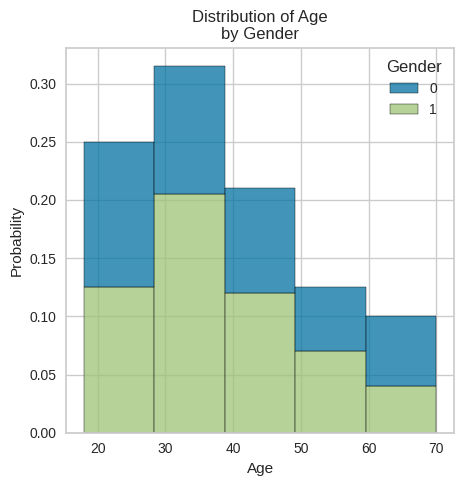

In [ ]:
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='Age', hue='Gender', multiple="stack", binwidth=10, stat="probability")
plt.title('Distribution of Age\nby Gender')
plt.show()

**Observations:**

- In the observation, there seems to be a higher concentration of males (blue) compared to females (orange).
- Overall, the distribution shows an interesting overlap and distinction in age groups between genders.

**Customers Average Age**

Text(0.5, 1.0, 'Customers Average Age')

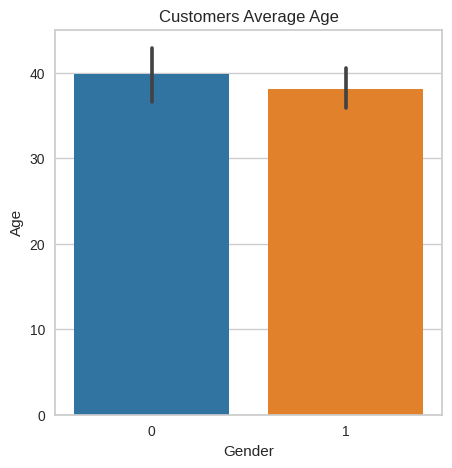

In [ ]:
plt.figure(figsize = (5,5))
sns.barplot(data = df, x = 'Gender', y = 'Age', palette=['#1f77b4', '#ff7f0e'])
plt.title('Customers Average Age')

**Customers Average Annual Income**

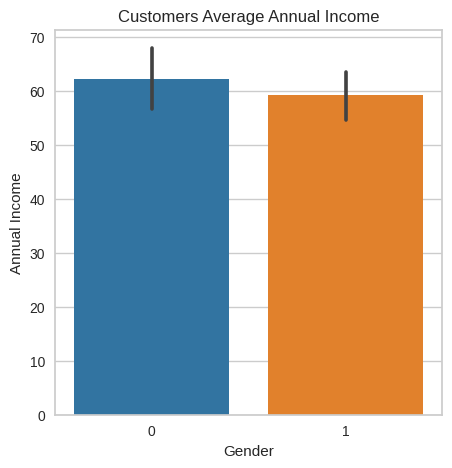

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(data=df, x='Gender', y='Annual Income', palette=['#1f77b4', '#ff7f0e'])
plt.title('Customers Average Annual Income')
plt.ylabel('Annual Income')
plt.show()

**Customers Average Spending Score**

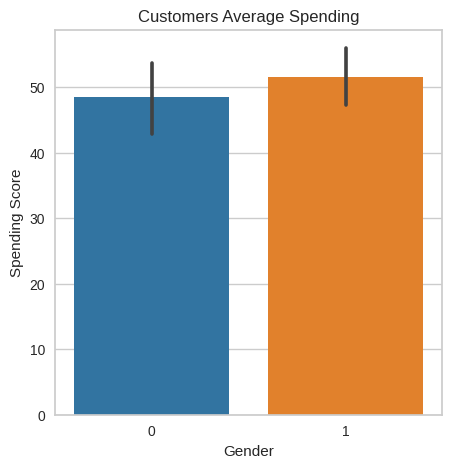

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(data=df, x='Gender', y='Spending Score', palette=['#1f77b4', '#ff7f0e'])
plt.title('Customers Average Spending')
plt.ylabel('Spending Score')
plt.show()

**Pair Plots for Spending Score vs Age**

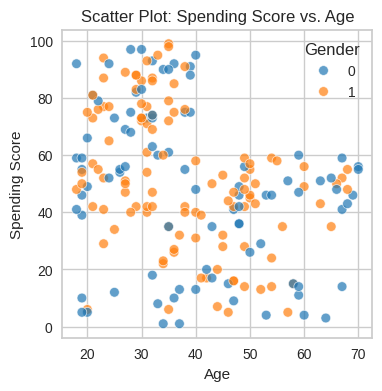

In [ ]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data=df, y='Spending Score', x='Age', hue='Gender', palette=['#1f77b4', '#ff7f0e'], alpha=0.7)
plt.title('Scatter Plot: Spending Score vs. Age')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend(title='Gender', loc='upper right')
plt.show()

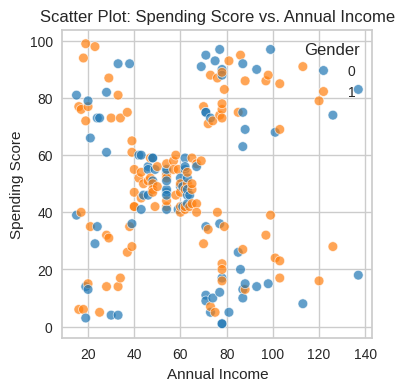

In [ ]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data=df, y='Spending Score', x='Annual Income', hue='Gender', palette=['#1f77b4', '#ff7f0e'], alpha=0.7)
plt.title('Scatter Plot: Spending Score vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Gender', loc='upper right')
plt.show()

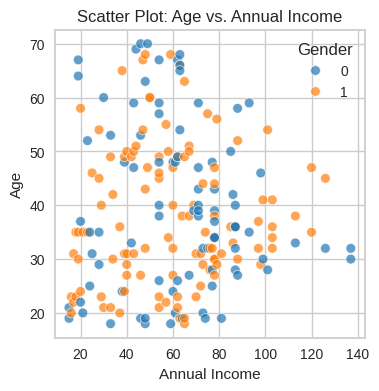

In [ ]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data=df, y='Age', x='Annual Income', hue='Gender', palette=['#1f77b4', '#ff7f0e'], alpha=0.7)
plt.title('Scatter Plot: Age vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Age')
plt.legend(title='Gender', loc='upper right')
plt.show()

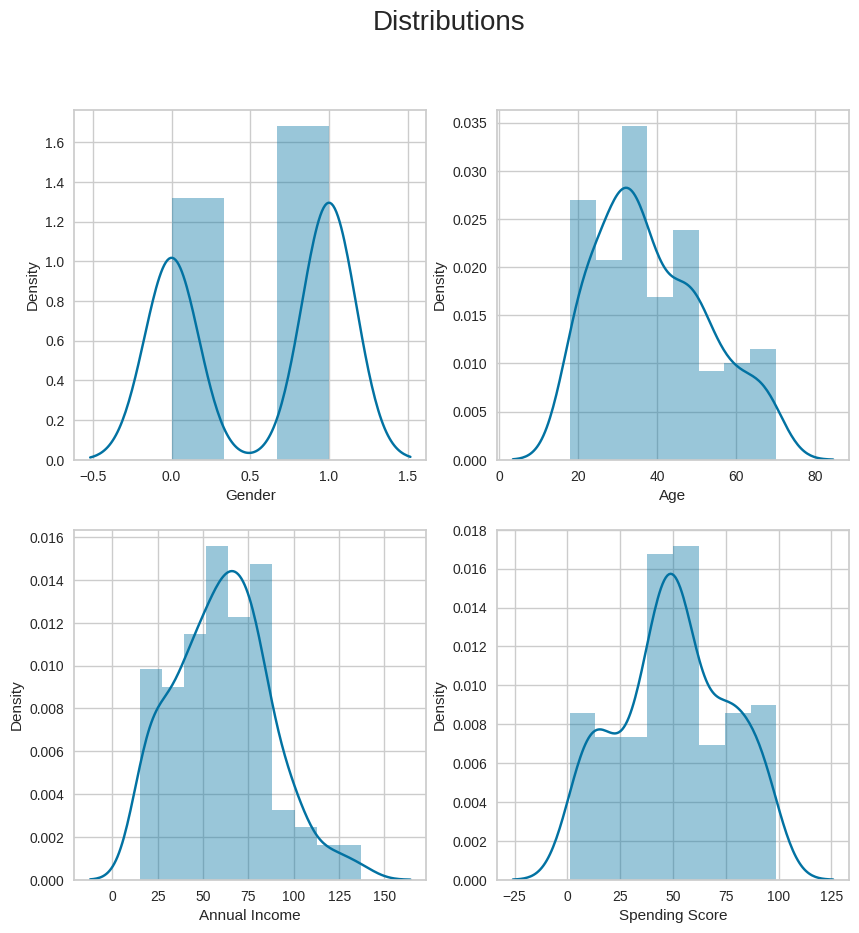

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# sns.histplot(data=raw_data, x="gender", bins=2, ax=axes[0,0], element="step")
sns.distplot(df["Gender"], ax=axes[0,0])

# sns.histplot(data=raw_data, x="age", bins=10, ax=axes[0,1], element="step", kde=True)
sns.distplot(df["Age"], ax=axes[0,1])

# sns.histplot(data=raw_data, x="annual_income", bins=20, ax=axes[1,0], element="step", kde=True)
sns.distplot(df["Annual Income"], ax=axes[1,0])

# sns.histplot(data=raw_data, x="spending_score", bins=20, ax=axes[1,1], element="step", kde=True)
sns.distplot(df["Spending Score"], ax=axes[1,1])

# plt.suptitle("Histogram", fontsize=20)
plt.suptitle("Distributions", fontsize=20)
plt.show()

In [ ]:
df.skew()

Gender           -0.243578
Age               0.485569
Annual Income     0.321843
Spending Score   -0.047220
dtype: float64

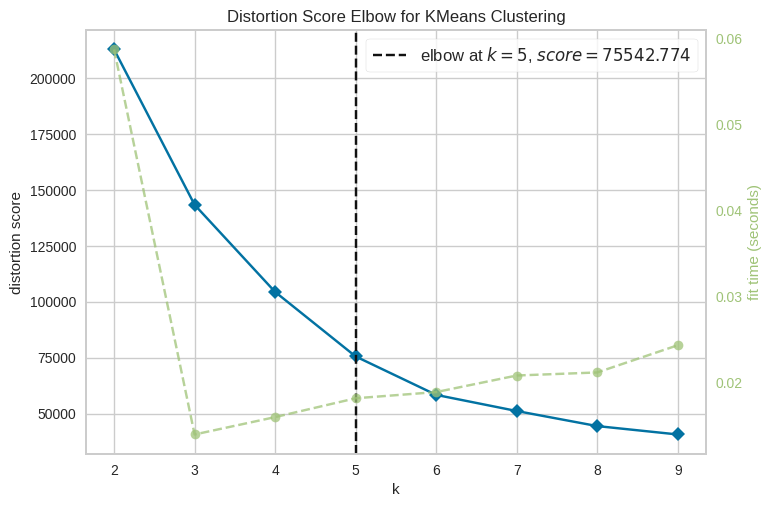

In [ ]:
model = KMeans(random_state=22)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df)
visualizer.show()
plt.show()

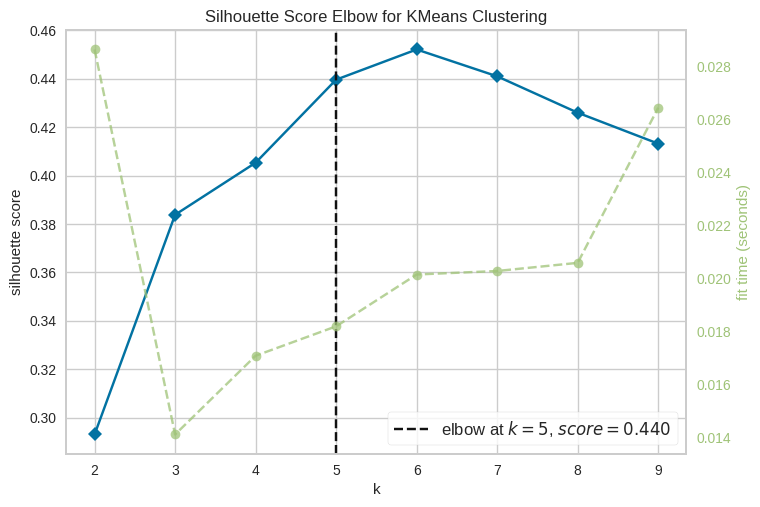

In [ ]:
model = KMeans(random_state=22)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')
visualizer.fit(df)
visualizer.show()
plt.show()

In [ ]:
#Calculate the within-cluster sum of squares
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

In [ ]:
# Calculates the inertia (WCSS) for a larger range of cluster numbers
clusters = range(1,20)
inertias = []
for n in clusters:
    kmeans = KMeans(n_init = 1, n_clusters = n)
    fitted_model = kmeans.fit(df)
    inertias.append(fitted_model.inertia_)

In [ ]:
SEED = np.random.seed(300)
kmeans = KMeans(n_clusters = 5, random_state = SEED)
labels = kmeans.fit_predict(df)
df['cluster'] = labels
print(f"Silhouette Score: {silhouette_avg}")

NameError: name 'silhouette_avg' is not defined

In [ ]:
df

In [ ]:
sns.scatterplot(data = df, x = 'Annual Income', y = 'Spending Score', hue = 'cluster', palette='colorblind')

In [ ]:
kmeans.cluster_centers_[:, 2]

In [ ]:
kmeans.cluster_centers_[:, 1]